In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [ ]:
# loading data to a pandsas daataframe
gold_data = pd.read_csv('gld_price_data.csv')

In [ ]:
#printing first 5 rows
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
#checking for any null values
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [ ]:
#getting statistical measures of data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
'''
CORRELATION:-
1)positive corelation (if 1st value increases 2nd value also increase)
2)negative corelation (if 1st value decreases 2nd value also decrese)

'''

# Convert the 'Date' column to datetime objects
gold_data['Date'] = pd.to_datetime(gold_data['Date'])

# Extract numerical features for correlation calculation
numerical_data = gold_data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation = numerical_data.corr()

<Axes: >

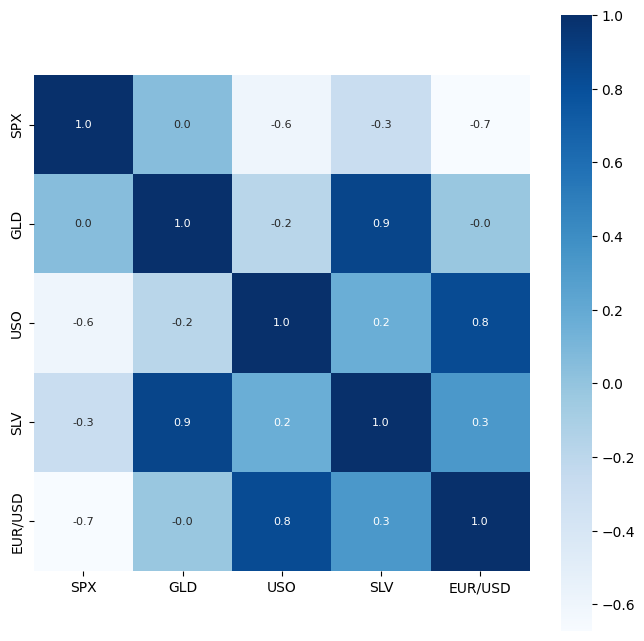

In [ ]:
#constructing a heatmap to understand correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square= True, fmt= '.1f', annot=True, annot_kws={'size':8}, cmap='Blues') #cbar=side bar, square=square boxes, fmt= floating point(.1f=till 1 decimal), annot= name of colums, annot_kws = size of annotations, cmap= colormap

In [ ]:
#correlational values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-11-ebecaee9c32d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color='green')


<Axes: xlabel='GLD', ylabel='Density'>

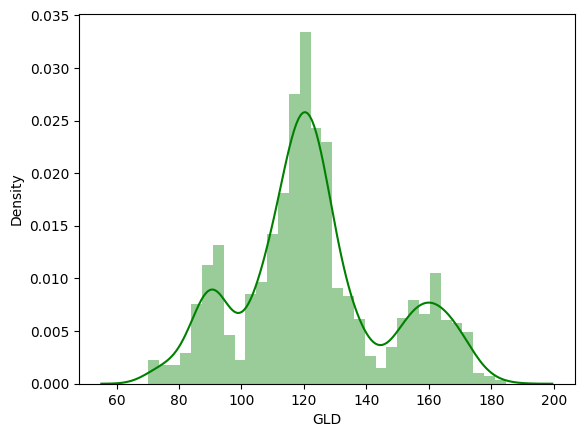

In [ ]:
#checking the distribution of GLD price
sns.distplot(gold_data['GLD'], color='green')

In [ ]:
 #data-preprocessing
features = gold_data.drop(['Date', 'GLD'], axis=1)
target = gold_data['GLD']

In [ ]:
features.head()
target.head()

,GLD
0,84.860001
1,85.570000
2,85.129997
3,84.769997
4,86.779999


In [ ]:
#splitting in training and test data
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, random_state=2)

In [ ]:
#model traning(random forest regressor)
regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
#traning the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [ ]:
#model evaluation
#prediction on test data
test_data_prediction = regressor.predict(X_test)
print(test_data_prediction)

[168.47659915  82.06459987 116.21050033 127.62700076 120.88300115
 154.68269758 150.4224983  126.05630055 117.44109871 126.16260036
 116.42070107 171.93820053 141.87309805 167.86959835 115.28809987
 117.62920045 137.22630346 169.66220054 159.64980294 160.0388001
 155.18830041 125.40330043 176.04069954 157.19530352 125.21010022
  94.00599977  77.27310026 120.82449989 119.03019914 167.37529983
  88.17730042 125.14790009  91.35090079 117.69250025 121.10549917
 136.33450093 115.42650147 115.08080094 147.21810013 107.33890071
 104.74390272  87.16729791 126.48700033 117.50010038 153.93889928
 119.63580008 108.40919983 107.93439834  93.29440043 127.15509775
  75.06160056 113.62149929 121.40189992 111.26569901 118.73849878
 120.47229972 158.3026995  167.3796013  146.97039719  85.89299865
  94.40560026  86.77189887  90.5531     119.05250053 126.42480088
 127.45110014 169.89870036 122.21559937 117.35609921  98.35760044
 167.75280183 143.21239888 131.83700188 121.1511023  121.04079935
 119.726000

In [ ]:
#R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9898173372668504


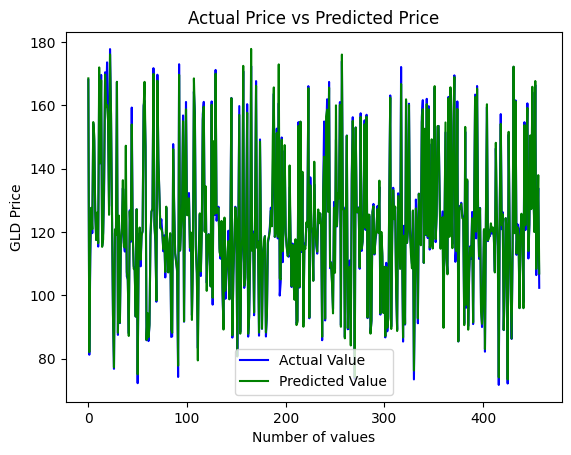

In [ ]:
#compare the actual valurs and predicted values in a plot
Y_test = list(Y_test)
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend() #shows the info of color and lable
plt.show()